In [1]:
#Step 1: Importing the libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Step 2: Importing the sales excel dataset
df=pd.read_excel('Case Study Data 1.xlsx')

In [9]:
df.head()

,Retailer Name,Brand1,Brand2,Brand3,Brand4,Brand5,Brand6,Brand7,Brand8,Brand9,Brand10,Brand11,Brand12,Total Sales,Number of Brands,Category of Retailer
0,Retailer 1,0.0000,0.0,0.0,0.000,0.0000,0.0,0.0,0.0,0.000,30826.61,0.0,0.0,30826.6100,1,NaN
1,Retailer 2,9833.1060,0.0,0.0,24073.632,33806.4312,0.0,0.0,0.0,0.000,0.00,0.0,0.0,67713.1692,3,NaN
2,Retailer 3,24690.6708,0.0,0.0,0.000,27367.0386,0.0,0.0,0.0,12948.696,0.00,0.0,0.0,65006.4054,3,NaN
3,Retailer 4,0.0000,0.0,0.0,0.000,0.0000,0.0,0.0,0.0,0.000,0.00,0.0,0.0,0.0000,0,NaN
4,Retailer 5,0.0000,0.0,0.0,0.000,0.0000,0.0,0.0,0.0,0.000,0.00,0.0,0.0,0.0000,0,NaN


In [3]:
#Step 3: find missing values in dataset
df.isnull().sum()

Retailer Name              0
Brand1                     0
Brand2                     0
Brand3                     0
Brand4                     0
Brand5                     0
Brand6                     0
Brand7                     0
Brand8                     0
Brand9                     0
Brand10                    0
Brand11                    0
Brand12                    0
Total Sales                0
Number of Brands           0
Category of Retailer    9938
dtype: int64

In [4]:
df.shape

(9938, 16)

Text(0,0.5,'Total Sales(Rupees)')

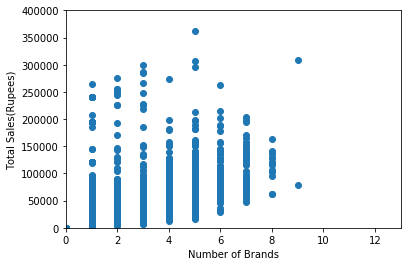

In [5]:
#Step 4: Visualising the selected attributes for detecting any Outliers 
plt.scatter(df['Number of Brands'],df['Total Sales'])
axes = plt.gca()
axes.set_xlim([0,13])
axes.set_ylim([0,400000])
plt.xlabel('Number of Brands')
plt.ylabel('Total Sales(Rupees)')

In [6]:
#this index value had total sales in 76L(other index range till 7L only) 
#so this is a outlier
df=df.drop(df.index[3972])

In [7]:
df.shape

(9937, 16)

In [8]:
#Step 5: Selecting the attributes
X=df.iloc[:,[13,14]].values

In [11]:
X

array([[3.08266100e+04, 1.00000000e+00],
       [6.77131692e+04, 3.00000000e+00],
       [6.50064054e+04, 3.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00],
       [4.83245740e+04, 2.00000000e+00],
       [0.00000000e+00, 0.00000000e+00]])

In [12]:
#Total count of Individual Number of Brands
df["Number of Brands"].value_counts()

0    6449
1    1453
2     717
3     577
4     355
5     212
6     103
7      55
8      14
9       2
Name: Number of Brands, dtype: int64

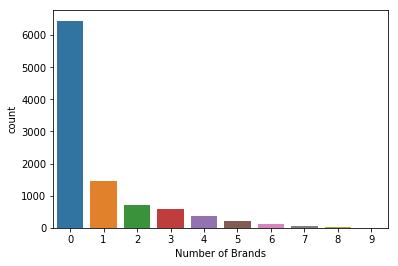

In [13]:
#Plot
sns.countplot(df['Number of Brands'])

In [14]:
#Step 6: Scaling Feature Attribues using MinMaxScaler
# Since both the attributes are very distinct
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

In [15]:
X

array([[0.04562153, 0.11111111],
       [0.10021143, 0.33333333],
       [0.09620558, 0.33333333],
       ...,
       [0.        , 0.        ],
       [0.07151747, 0.22222222],
       [0.        , 0.        ]])

In [16]:
#Step 7: Applying k-means clustering to the sales dataset
#n_clusters=3 since categories are A,B & C
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
y_predict = km.fit_predict(X)

In [17]:
y_predict

array([0, 2, 2, ..., 0, 2, 0])

In [18]:
#replacing the 'Category of Retailer' column with y_predict values
df['Category of Retailer']=y_predict

In [19]:
df.head()

,Retailer Name,Brand1,Brand2,Brand3,Brand4,Brand5,Brand6,Brand7,Brand8,Brand9,Brand10,Brand11,Brand12,Total Sales,Number of Brands,Category of Retailer
0,Retailer 1,0.0000,0.0,0.0,0.000,0.0000,0.0,0.0,0.0,0.000,30826.61,0.0,0.0,30826.6100,1,0
1,Retailer 2,9833.1060,0.0,0.0,24073.632,33806.4312,0.0,0.0,0.0,0.000,0.00,0.0,0.0,67713.1692,3,2
2,Retailer 3,24690.6708,0.0,0.0,0.000,27367.0386,0.0,0.0,0.0,12948.696,0.00,0.0,0.0,65006.4054,3,2
3,Retailer 4,0.0000,0.0,0.0,0.000,0.0000,0.0,0.0,0.0,0.000,0.00,0.0,0.0,0.0000,0,0
4,Retailer 5,0.0000,0.0,0.0,0.000,0.0000,0.0,0.0,0.0,0.000,0.00,0.0,0.0,0.0000,0,0


In [20]:
#counting values of different clusters
df['Category of Retailer'].value_counts()

0    7870
2    1326
1     741
Name: Category of Retailer, dtype: int64

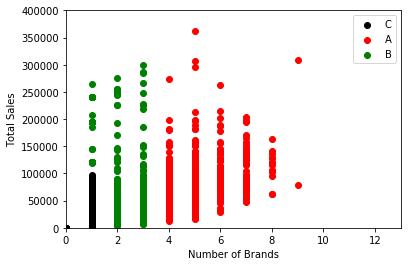

In [22]:
#Step 8: Now Visualise both the attributes w.r.t different clusters
df1 = df[df['Category of Retailer']==0]
df2 = df[df['Category of Retailer']==1]
df3 = df[df['Category of Retailer']==2]
plt.scatter(df1['Number of Brands'],df1['Total Sales'],color='black',label='C')
plt.scatter(df2['Number of Brands'],df2['Total Sales'],color='red',label='A')
plt.scatter(df3['Number of Brands'],df3['Total Sales'],color='green',label='B')
axes = plt.gca()
axes.set_xlim([0,13])
axes.set_ylim([0,400000])
plt.xlabel('Number of Brands')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

In [23]:
#Step 9: Replacing cluster values 0,1&2 with Categories A, B and C
df['Category of Retailer'] = df['Category of Retailer'].replace([2], 'B')
df['Category of Retailer'] = df['Category of Retailer'].replace([1], 'A')
df['Category of Retailer'] = df['Category of Retailer'].replace([0], 'C')

In [24]:
df.head()

,Retailer Name,Brand1,Brand2,Brand3,Brand4,Brand5,Brand6,Brand7,Brand8,Brand9,Brand10,Brand11,Brand12,Total Sales,Number of Brands,Category of Retailer
0,Retailer 1,0.0000,0.0,0.0,0.000,0.0000,0.0,0.0,0.0,0.000,30826.61,0.0,0.0,30826.6100,1,C
1,Retailer 2,9833.1060,0.0,0.0,24073.632,33806.4312,0.0,0.0,0.0,0.000,0.00,0.0,0.0,67713.1692,3,B
2,Retailer 3,24690.6708,0.0,0.0,0.000,27367.0386,0.0,0.0,0.0,12948.696,0.00,0.0,0.0,65006.4054,3,B
3,Retailer 4,0.0000,0.0,0.0,0.000,0.0000,0.0,0.0,0.0,0.000,0.00,0.0,0.0,0.0000,0,C
4,Retailer 5,0.0000,0.0,0.0,0.000,0.0000,0.0,0.0,0.0,0.000,0.00,0.0,0.0,0.0000,0,C
